In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time 
from scipy import stats
import rebound
from scipy.special import gamma
from scipy.stats import norm, ks_2samp

# Merge dataframes

In [2]:
file_path = "/mnt/scratch-lustre/nhussain/data/distributions/Long300/"#"../../../LongScaleCsvs/"
planet_systems = np.loadtxt(file_path +"Order.txt", dtype = str)
print(planet_systems.shape)

(266,)


In [3]:
#save data
#info.to_csv("../../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences_{0}.csv".format(info.shape[0]))

#FILTER DATA (between 1e4 and 1e7)
info = pd.read_csv("../../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences_266.csv", index_col=0)

#fully integrated data
short_feats = pd.read_csv("../../csvs/deltatimes.csv", index_col =0 )
subsystem = info["ID"].values.astype(int)
sub_short = short_feats.loc[subsystem]
print(sub_short.shape)

#filtered data params
filtered = sub_short[ (sub_short["t"]>1e4) & (sub_short["t"]<1e7) &
                    (sub_short["t_shadow"]>1e4 ) & (sub_short["t_shadow"]<1e7) ] 

print(filtered.shape)
filtered_inds = filtered.index
#df.loc[df['column_name'].isin(some_values)]
valid = info.loc[info["ID"].isin(filtered_inds)] 
valid.head()

(266, 3)
(248, 3)


,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,1007,0.130767,5.584131,0.461519,0.014201,0.010451,2.201230e-08
1,1021,0.185651,6.008010,0.330157,0.010570,0.007475,6.242409e-09
2,1025,0.154975,5.797448,0.387122,0.012399,0.008591,1.134396e-08
3,1041,0.123930,5.732675,0.489208,0.015449,0.010785,2.773702e-08
4,10518,0.143696,6.469809,0.431217,0.013868,0.009608,1.775222e-08


In [4]:
#info = pd.read_csv("../../Figures/MCMCFigures/Weibull_MCMC_Params_266.csv", index_col = 0)
info = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_266.csv", index_col =0 )
info['EV'] = info['Location'] + info['Alpha']*gamma(1+1/info['Gamma']) #EV of weibull
info.tail()

,ID,Gamma,Location,Alpha,EV
261,8462.0,2.096314,4.459373,1.199551e+00,5.521821
262,8582.0,0.184163,1.996260,1.191003e+00,304.531030
263,8744.0,0.833252,4.705257,1.546389e-01,4.875650
264,91.0,1.634222,4.750447,8.097842e-01,5.475133
265,99.0,0.999930,7.983125,8.810369e-16,7.983125


In [5]:
df = pd.merge(valid, info, on='ID', how='inner')
df.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant,Gamma,Location,Alpha,EV
0,1007,0.130767,5.584131,0.461519,0.014201,0.010451,2.201230e-08,2.614027,4.447527,1.283371,5.587615
1,1021,0.185651,6.008010,0.330157,0.010570,0.007475,6.242409e-09,3.269655,4.989150,1.129664,6.002008
2,1025,0.154975,5.797448,0.387122,0.012399,0.008591,1.134396e-08,2.249906,4.965337,0.938566,5.796653
3,1041,0.123930,5.732675,0.489208,0.015449,0.010785,2.773702e-08,1.856930,4.863439,0.972277,5.726901
4,10518,0.143696,6.469809,0.431217,0.013868,0.009608,1.775222e-08,1.596694,5.781111,0.761953,6.464390


In [6]:
df.shape

(248, 11)

# Plot distributions. Red = gamma, black = gaussian

In [7]:
def plot_hists(planet_systems):
    ncol, nrow = 3,len(planet_systems)//3+1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data =pd.read_csv(file_path+'Sys_{0}_1e8.csv'.format(planet_sys), index_col = 0)
        
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = str(planet_sys)
        # make guassian
        gamma, mean, alpha =  df[df["ID"]==int(name)][["Gamma","Location", "Alpha"]].values[0]
        print(gamma, mean, alpha)
        x = np.linspace(data["logt"].min(), data["logt"].max(), 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=mean,scale = alpha)
        #axarr[jj//ncol, jj%ncol ].plot(x, vals, linewidth = 4, color = "red")
        mean, sigma =  df[df["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name, alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        
    plt.show()
    plt.close(fig)

0.913574821091 5.11056062599 0.0450298550618
0.913574821091 5.11056062599 0.0450298550618
0.913574821091 5.11056062599 0.0450298550618


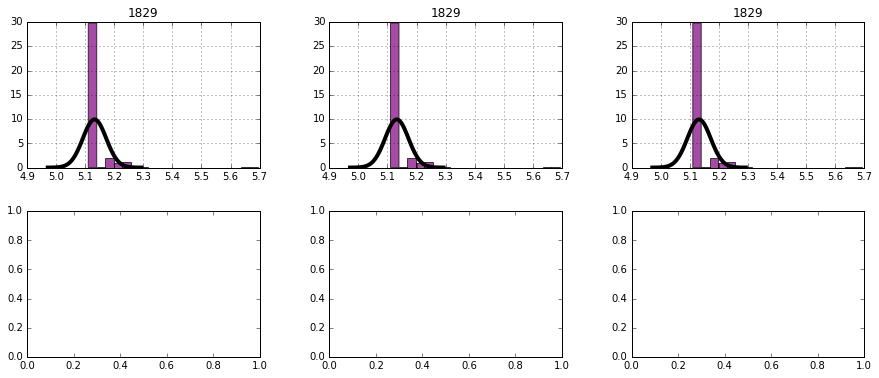

In [8]:
plot_hists([1829]*3)

# Plot Orbits

In [9]:
from rebound.plotting import OrbitPlotOneSlice
def plotorbits(IDs):
    ncol, nrow = 3,len(IDs)//3+1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , ID in enumerate(IDs[:ncol*nrow]):
        file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
        sim = rebound.Simulation.from_file(file)
        axarr[jj//ncol, jj%ncol].set_aspect('equal')
        OrbitPlotOneSlice(sim, axarr[jj//ncol, jj%ncol], trails=True) 
        

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


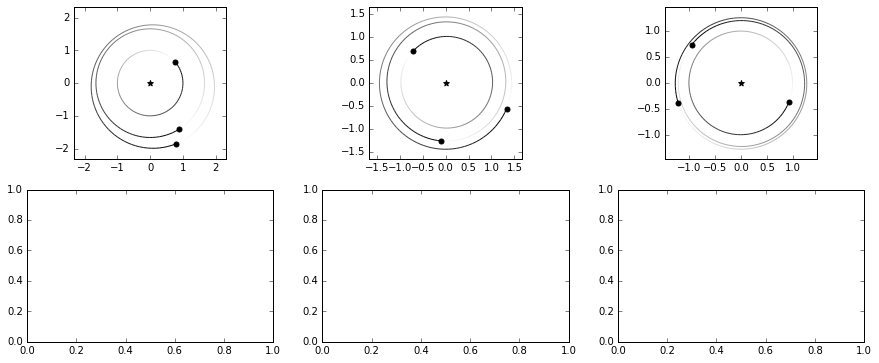

In [10]:
plotorbits(df[df['EV']<4]['ID'])

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


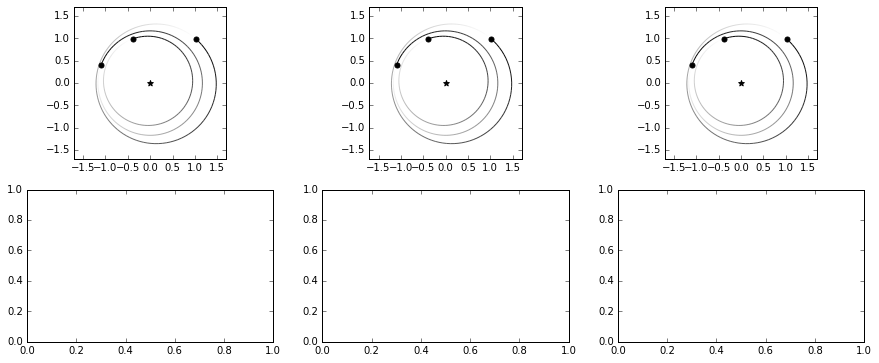

In [11]:
plotorbits([2364]*3)

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


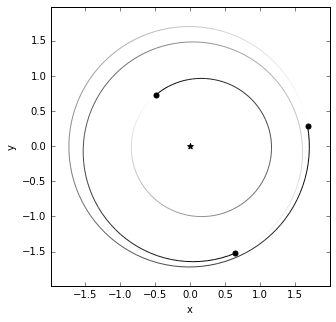

In [12]:
ID = 1880
file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
sim = rebound.Simulation.from_file(file)
fig = rebound.OrbitPlot(sim)   

In [50]:
from rebound.plotting import OrbitPlotOneSlice
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plotecc(ID, tmax=1.e4):
    fig, axarr = plt.subplots(ncols=3, figsize=(12,8))
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
    sim = rebound.Simulation.from_file(file)
    sim.init_megno()
    rebound.OrbitPlot(sim)
    ps = sim.particles
    RH12 = ((ps[1].m+ps[2].m)/3.)**(1./3.)*ps[1].a
    RH23 = ((ps[2].m+ps[3].m)/3.)**(1./3.)*ps[2].a
    Nout = 1000
    times = np.linspace(0, tmax, Nout)
    e1, e2, e3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    a1, a2, a3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    d12, d32 = np.zeros(Nout), np.zeros(Nout)
    a10 = sim.particles[1].a
    a20 = sim.particles[2].a
    a30 = sim.particles[3].a
    print('m', sim.particles[1].m, sim.particles[2].m, sim.particles[3].m)
    print('Pratio', sim.particles[2].P/sim.particles[1].P, sim.particles[3].P/sim.particles[2].P, sim.particles[3].P/sim.particles[1].P)
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
        except:
            print(sim.t)
            break
        e1[i] = sim.particles[1].e
        e2[i] = sim.particles[2].e
        e3[i] = sim.particles[3].e
        a1[i] = sim.particles[1].a
        a2[i] = sim.particles[2].a
        a3[i] = sim.particles[3].a
        de12 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[1].e*np.cos(ps[1].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[1].e*np.sin(ps[1].pomega))**2)
        de32 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[3].e*np.cos(ps[3].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[3].e*np.sin(ps[3].pomega))**2)
        da12 = (ps[2].a-ps[1].a)/ps[1].a
        da32 = (ps[3].a-ps[2].a)/ps[2].a
        d12[i] = (da12-de12)/RH12-1.
        d32[i] = (da32-de32)/RH23-1.
    
    axarr[0].plot(times[e1!=0], e1[e1!=0], label='e1')
    axarr[0].plot(times[e1!=0], e2[e1!=0], label='e2')
    axarr[0].plot(times[e1!=0], e3[e1!=0], label='e3')
    axarr[1].plot(times[e1!=0], (a1[e1!=0]-a10)/a10, label='da1')
    axarr[1].plot(times[e1!=0], (a2[e1!=0]-a20)/a20, label='da2')
    axarr[1].plot(times[e1!=0], (a3[e1!=0]-a30)/a30, label='da3')
    
    if d12[e1!=0].min() < d32[e1!=0].min():
        axarr[2].plot(times[e1!=0], d12[e1!=0], '.', label='d12')
    else:
        axarr[2].plot(times[e1!=0], d32[e1!=0], '.', label='d32')
    
    axarr[1].set_yscale('log')
    axarr[0].legend()
    axarr[1].legend()
    axarr[2].legend()
    
    p1 = np.poly1d(np.polyfit(times[e1!=0], e1[e1!=0], 3))
    p2 = np.poly1d(np.polyfit(times[e1!=0], e2[e1!=0], 3))
    p3 = np.poly1d(np.polyfit(times[e1!=0], e3[e1!=0], 3))

    m1 = p1(times[e1!=0])
    m2 = p2(times[e1!=0])
    m3 = p3(times[e1!=0])
    
    std1 = pd.Series(e1[e1!=0]-m1).std()
    std2 = pd.Series(e2[e1!=0]-m2).std()
    std3 = pd.Series(e3[e1!=0]-m3).std()
    std = max(max(std1, std2), std3)
    
    axarr[0].plot(times[e1!=0], m1)
    axarr[0].plot(times[e1!=0], m2)
    axarr[0].plot(times[e1!=0], m3)
    
    print('std', std1, std2, std3)
    
    da1 = np.median((a1[e1!=0]-a10)/a10)
    da2 = np.median((a2[e1!=0]-a20)/a20)
    da3 = np.median((a3[e1!=0]-a30)/a30)
    
    da = max(max(da1, da2), da3)
    lyap = 1/sim.calculate_lyapunov()
    mind = min(d12[e1!=0].min(), d32[e1!=0].min())
    maxm = max(max(ps[1].m, ps[2].m), ps[3].m)
    print('final time', sim.t)
    rebound.OrbitPlot(sim)
    return axarr, std, da, lyap, mind, maxm, sim

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


m 1.3517205214120819e-06 6.030669427572176e-05 3.3910970370555785e-05
Pratio 1.310262609823137 2.4737661505404294 3.241283292499238
std 0.0188853044378 0.000708017283355 0.00330698825256


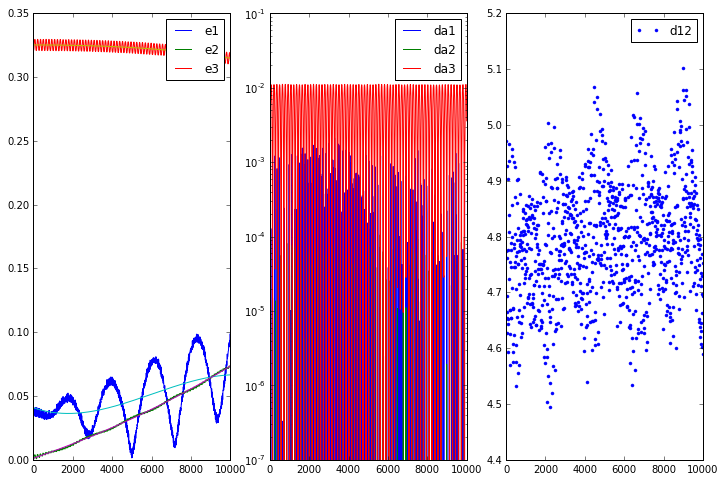

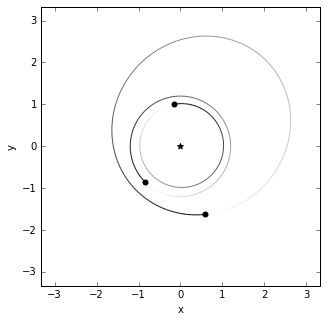

In [18]:
axarr, std, da, tlyap, mind, maxm, sim = plotecc(25)

# Make additional features to plot

In [16]:
def run(row):
    system = int(row['ID'])
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(system, 0)
    
    sim = rebound.Simulation.from_file(file)
    ps = sim.particles
    RH12 = ((ps[1].m+ps[2].m)/3.)**(1./3.)*ps[1].a
    RH23 = ((ps[2].m+ps[3].m)/3.)**(1./3.)*ps[2].a
    sim.init_megno()
    Nout = 1000
    times = np.linspace(0, 1e4, Nout)
    e1, e2, e3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    a1, a2, a3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    d12, d32 = np.zeros(Nout), np.zeros(Nout)
    a10 = sim.particles[1].a
    a20 = sim.particles[2].a
    a30 = sim.particles[3].a
    
    rebound.OrbitPlot(sim)
    for i, time in enumerate(times):
        print(sim.particles[4].x)
        try:
            sim.integrate(time)
        except:
            break
        e1[i] = sim.particles[1].e
        e2[i] = sim.particles[2].e
        e3[i] = sim.particles[3].e
        a1[i] = sim.particles[1].a
        a2[i] = sim.particles[2].a
        a3[i] = sim.particles[3].a
        de12 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[1].e*np.cos(ps[1].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[1].e*np.sin(ps[1].pomega))**2)
        de32 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[3].e*np.cos(ps[3].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[3].e*np.sin(ps[3].pomega))**2)
        da12 = (ps[2].a-ps[1].a)/ps[1].a
        da32 = (ps[3].a-ps[2].a)/ps[2].a
        d12[i] = (da12-de12)/RH12-1.
        d32[i] = (da32-de32)/RH23-1.
    
    rebound.OrbitPlot(sim)
    p1 = np.poly1d(np.polyfit(times[e1!=0], e1[e1!=0], 3))
    p2 = np.poly1d(np.polyfit(times[e1!=0], e2[e1!=0], 3))
    p3 = np.poly1d(np.polyfit(times[e1!=0], e3[e1!=0], 3))

    m1 = p1(times[e1!=0])
    m2 = p2(times[e1!=0])
    m3 = p3(times[e1!=0])
    
    std1 = pd.Series(e1[e1!=0]-m1).std()
    std2 = pd.Series(e2[e1!=0]-m2).std()
    std3 = pd.Series(e3[e1!=0]-m3).std()
    std = max(max(std1, std2), std3)
    
    da1 = np.median((a1[e1!=0]-a10)/a10)
    da2 = np.median((a2[e1!=0]-a20)/a20)
    da3 = np.median((a3[e1!=0]-a30)/a30)
    
    da = max(max(da1, da2), da3)
    
    np.random.seed(3)
    data =pd.read_csv("/mnt/scratch-lustre/nhussain/data/distributions/Long300/Sys_{0}_1e8.csv".format(system), index_col = 0)
    del data["Unnamed: 0.1"]
    del data["runstring"]
    data = data[data["t"]<1e8]
    data = np.log10(data["t"].values)

    # normal we want to match
    test = np.random.normal(loc=row["Mean"], scale=row["Sigma"], size = data.shape[0])

    #ks test
    try:
        statistic, KSpval = ks_2samp(data, test)
    except:
        statistic, KSpval = 0,0
    
    tlyap = 1/sim.calculate_lyapunov()
    print(sim.calculate_megno())
    mind = min(d12[e1!=0].min(), d32[e1!=0].min())
    maxm = max(max(ps[1].m, ps[2].m), ps[3].m)
    
    return std, da, tlyap, mind, maxm, KSpval

In [20]:
%%time
df['maxstddetrended'], df['maxda'], df['tlyap'], df['mind'], df['maxm'], df['KSpval'] = zip(*df.apply(run, axis=1))
df.head()

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


CPU times: user 5min 41s, sys: 529 ms, total: 5min 42s
Wall time: 5min 55s


In [21]:
df.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant,Gamma,Location,Alpha,EV,maxstddetrended,maxda,tlyap,mind,maxm,KSpval
0,1007,0.130767,5.584131,0.461519,0.014201,0.010451,2.201230e-08,2.614027,4.447527,1.283371,5.587615,0.002645,0.032087,1.087928e+02,4.544416,0.000037,9.386954e-02
1,1021,0.185651,6.008010,0.330157,0.010570,0.007475,6.242409e-09,3.269655,4.989150,1.129664,6.002008,0.002670,0.000168,1.510911e+03,6.145565,0.000004,3.072049e-01
2,1025,0.154975,5.797448,0.387122,0.012399,0.008591,1.134396e-08,2.249906,4.965337,0.938566,5.796653,0.001989,0.000109,1.074197e+03,5.409844,0.000001,2.789818e-02
3,1041,0.123930,5.732675,0.489208,0.015449,0.010785,2.773702e-08,1.856930,4.863439,0.972277,5.726901,0.001031,0.000636,1.117891e+06,0.765964,0.000002,8.813668e-07
4,10518,0.143696,6.469809,0.431217,0.013868,0.009608,1.775222e-08,1.596694,5.781111,0.761953,6.464390,0.000726,0.000015,1.317746e+07,10.796477,0.000048,4.772941e-03


In [22]:
df.to_csv('distributionfeaturesnew.csv')

In [3]:
df = pd.read_csv('distributionfeaturesnew.csv', index_col=0)
df.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant,Gamma,Location,Alpha,EV,maxstddetrended,maxda,tlyap,mind,maxm,KSpval
0,1007,0.130767,5.584131,0.461519,0.014201,0.010451,2.201230e-08,2.614027,4.447527,1.283371,5.587615,0.002645,0.032087,1.087928e+02,4.544416,0.000037,9.386954e-02
1,1021,0.185651,6.008010,0.330157,0.010570,0.007475,6.242409e-09,3.269655,4.989150,1.129664,6.002008,0.002670,0.000168,1.510911e+03,6.145565,0.000004,3.072049e-01
2,1025,0.154975,5.797448,0.387122,0.012399,0.008591,1.134396e-08,2.249906,4.965337,0.938566,5.796653,0.001989,0.000109,1.074197e+03,5.409844,0.000001,2.789818e-02
3,1041,0.123930,5.732675,0.489208,0.015449,0.010785,2.773702e-08,1.856930,4.863439,0.972277,5.726901,0.001031,0.000636,1.117891e+06,0.765964,0.000002,8.813668e-07
4,10518,0.143696,6.469809,0.431217,0.013868,0.009608,1.775222e-08,1.596694,5.781111,0.761953,6.464390,0.000726,0.000015,1.317746e+07,10.796477,0.000048,4.772941e-03


# Make different combinations and plot

In [27]:
df[df['tlyap'] < 0]['KSpval']

6      4.257726e-03
15     1.180949e-14
34     8.591195e-20
36     2.326071e-05
43     2.331498e-37
44     5.030259e-57
55     2.734533e-09
61     1.796221e-24
67     7.695895e-64
102    1.084816e-70
117    8.547289e-01
128    4.303541e-25
141    5.856996e-02
143    1.939690e-10
148    1.343061e-03
156    3.632700e-03
160    1.157807e-02
181    1.251120e-04
186    8.117557e-05
202    1.939690e-10
217    7.435316e-02
219    1.331827e-12
225    1.651243e-07
236    1.234020e-07
Name: KSpval, dtype: float64

In [26]:
df[df['tlyap'].isnull()]['KSpval']

27     6.624515e-05
53     3.288992e-08
71     1.048034e-01
77     1.622508e-02
85     2.706690e-11
88     1.007939e-01
97     6.374476e-01
108    5.956733e-01
164    7.530473e-01
168    4.171790e-02
170    9.135742e-03
173    7.435316e-02
206    1.052277e-02
238    3.197555e-05
244    5.248612e-02
Name: KSpval, dtype: float64

In [22]:
df[df['Mean'] > 7]

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant,Gamma,Location,Alpha,EV,maxstddetrended,maxda,tlyap,mind,maxm,KSpval
165,2135,0.153501,7.04169,0.420865,0.013525,0.009751,1.738739e-08,3.114554,5.85216,1.328221,7.040254,0.000985,0.000046,16801.771456,7.757361,0.000019,0.341096


In [9]:
df[df['ID']==2126]

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant,Gamma,Location,Alpha,EV,maxstddetrended,maxda,tlyap,mind,maxm,KSpval
164,2126,0.18294,5.315302,0.341045,0.010742,0.007636,6.728264e-09,3.8211,4.125355,1.312049,5.311534,0.015409,0.009898,NaN,6.314814,0.000079,0.753047


0.150897394144
0.150897394144
-6.35589454291
-12.861644661
-19.3649478546
-25.8742661674
-32.3814765188
-38.8811204204
-45.3891006171
-51.90136389
-58.3994153974
-64.9021623609
-71.42087062
-77.9220813193
-84.4150524414
-90.9379845662
-97.4494384243
-103.931971056
-110.449309501
-116.977155746
-123.455835229
-129.957513445
-136.498054118
-142.98533444
-149.468951767
-156.008540166
-162.514731597
-168.988764676
-175.514639293
-182.040853776
-188.516817482
-195.024253344
-201.566305723
-208.052719521
-214.536506617
-221.088844902
-227.596981574
-234.056009789
-240.599910009
-247.142396147
-253.589525623
-260.104055707
-266.674946538
-273.137416414
-279.615472542
-286.193015676
-292.691227406
-299.145132126
-305.706097381
-312.240935633
-318.692625034
-325.220529194
-331.782649174
-338.243424283
-344.729402862
-351.309442281
-357.794145048
-364.23703159
-370.812099534
-377.346279386
-383.761846106
-390.297550518
-396.883282158
-403.308548934
-409.785501051
-416.394096118
-422.861792919
-4

-3656.59767251
-3662.65979663
-3670.1696367
-3676.52950465
-3682.31723394
-3689.41421297
-3696.35022482
-3702.22101426
-3708.85870826
-3715.91993316
-3722.17991207
-3728.58397134
-3735.46590738
-3741.92853225
-3748.1489215
-3754.91282511
-3761.63874937
-3767.45457796
-3774.09059671
-3781.35351075
-3787.0136917
-3793.25772428
-3800.81930059
-3806.85855632
-3812.65185498
-3820.00562098
-3826.74557759
-3832.32898655
-3839.15998245
-3846.42422561
-3852.21306962
-3858.58276823
-3865.79919655
-3872.03387872
-3878.31453418
-3885.05032518
-3891.5211296
-3897.63363319
-3904.23739386
-3910.95892387
-3916.83626912
-3923.2249494
-3930.5098742
-3936.38053097
-3942.32118213
-3949.76311599
-3956.16514764
-3961.67478741
-3968.77483265
-3975.87417986
-3981.28462636
-3987.79234998
-3995.26101699
-4000.98159233
-4007.05065947
-4014.22480286
-4020.56846953
-4026.48949526
-4033.17098542
-4039.73814053
-4045.98172867
-4052.49374607
-4059.39743441
-4065.60473331
-4072.00942171
-4079.32806247
-4085.59181785
-

(0.00098487638644307283,
 4.5714006297454227e-05,
 56968.33405934194,
 7.7573606175649168,
 1.935079379067354e-05,
 0.34109577599584695)

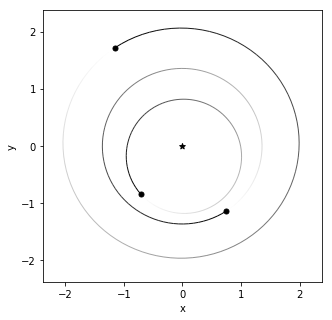

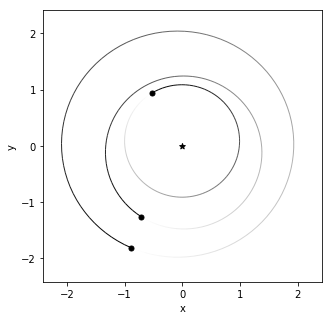

In [23]:
run(df[df['ID']==2135])

0.174637868581
0.174637868581
3.85256772704
7.52672510531
11.1910722578
14.8438935024
18.4904626709
22.139040177
25.9414409108
30.3385428548
34.3817094168
36.9686532556
38.6911443959
42.7405505937
47.5092552146
52.0449955149
53.8765587809
52.6946249456
56.3983546781
71.1016129017
73.2591886557
61.484990276
-52.7456194539
-214.961440745
42.755550903
547.3007763
660.575735524
59.1746477018
669.950340825
2587.58956791
3961.35342515
2004.68666312
-7168.92588647
-16032.3648469
-1635.15645587
13368.0134512
16592.4499373
-836.630678756
-1766.4956856
5407.94304563
-13007.3605585
-39039.3107414
-35487.27658
23438.3652687
106139.517138
361548.552375
212394.266143
-8565.85521027
-338811.643164
-860148.910164
15064.6986385
126269.015797
-570197.834887
-582680.236093
824367.839951
1580558.01299
29850669.1901
119781611.249
466920752.987
-187822877.226
-245963485.375
21233885.2205
1269356080.56
1811867495.3
975248666.565
-67998840.2011
2833472212.98
-915915808.894
-8612320125.28
-3757720701.06
751712

-1.13692806127e+98
-3.4022085961e+97
-1.32176479852e+98
2.79525951174e+98
8.27441300695e+97
-2.51070613569e+97
4.34549517978e+96
1.47070927865e+99
3.98991295081e+98
-1.80878782592e+98
5.85780060501e+99
4.37292484159e+99
-9.44683216919e+97
-1.68741334735e+99
-3.86756282745e+100
-5.14931076779e+100
1.30776134434e+100
9.52911264785e+99
-4.16320563963e+100
-7.21929803623e+100
-1.38689451732e+101
3.03654693049e+101
-1.09847740491e+102
-1.17665837454e+103
-1.1810203298e+103
-5.35424580355e+102
8.72862403907e+102
-1.71179917039e+103
5.35542255485e+103
5.71845041275e+103
-4.95889867208e+102
1.9799628057e+103
2.06803516302e+102
4.63521674503e+103
2.7882493039e+104
5.70257242312e+104
2.37961174949e+105
6.88401065235e+105
7.95883373046e+105
5.79967185289e+105
8.57283252712e+105
1.20023722305e+106
8.60324734605e+105
-1.61962106555e+104
-7.26444048999e+106
-1.91594317398e+107
-1.98993021494e+106
9.39307247829e+106
-6.40627234207e+106
-2.61934128576e+108
-5.86889062847e+107
2.92609526116e+108
1.6178

(0.015409122782725897,
 0.0098981300903147225,
 nan,
 6.3148139326155412,
 7.917011181536068e-05,
 0.75304729615225796)

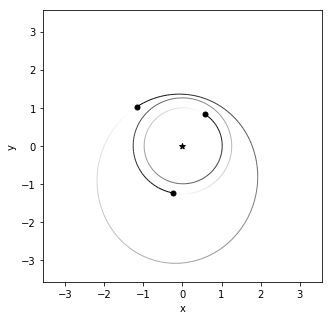

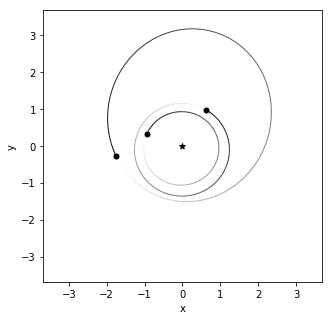

In [17]:
run(df[df['ID']==2126])

In [25]:
bad = df[df['KSpval']<1.e-10]['ID'].values
bad

array([ 1190,  1223,  1230,  1277,  1356,  1364,  1424,  1508,  1601,
        1640,  1742,  1775,  1785,  1819,  1829,  1837,  1880,  1886,
        1928,  1942,  1946,  1957,  1992,  2077,  2215,  2274,  2288,
        2300,  2341,  2364,  2399, 24453, 24930,  4753,  8744])

In [26]:
good = df[df['KSpval']>1.e-10]['ID'].values
good

array([ 1007,  1021,  1025,  1041, 10518,  1052,  1107,  1120,  1124,
        1128,  1136,  1137,  1138,  1169,  1174,  1194,  1197,     1,
        1204,  1206, 12073,  1208,  1217,  1235,  1237,  1241,  1248,
        1251,  1261,  1266,  1270, 12840,  1308,  1313,  1323,  1324,
        1337,  1344,  1350,  1366,  1375,  1379,  1396,  1403,  1408,
        1412,  1426,  1438,  1449,  1476,  1488, 15003,  1504,  1507,
        1513,  1514, 15220,  1590,  1598,  1613,  1616,  1617,  1625,
        1627,  1635,  1636,  1646,  1648,  1657, 16588,  1667,  1675,
        1689,  1691,  1720,  1753, 17641,  1766,  1768,  1791,  1796,
        1799,  1805,  1806,  1810,  1815,  1823,  1827,  1831,  1838,
        1843,  1850,  1852, 18539, 18651,  1875,  1877,  1879,  1899,
        1900,  1911,  1913,  1918, 19197,  1922,  1924,  1929,  1943,
        1954, 19591,  1971,  1979, 19898,  1996,  1999, 20041,  2010,
        2018,  2030,  2032,  2048,  2059, 20620,  2062,  2063,  2066,
        2081,  2083,

In [27]:
weirdmask = df['KSpval'] < 1.e-10 #df['ID'].isin(weird_systems)
weird = df[weirdmask]

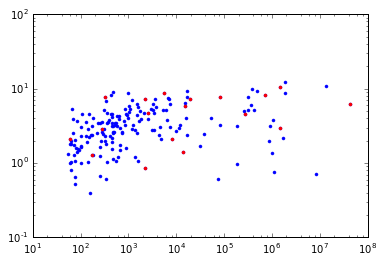

In [28]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['mind'], 'b.')
ax.plot(weird['tlyap'], weird['mind'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

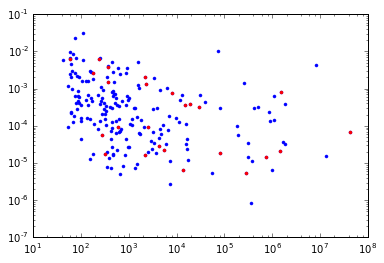

In [29]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['maxda'], 'b.')
ax.plot(weird['tlyap'], weird['maxda'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

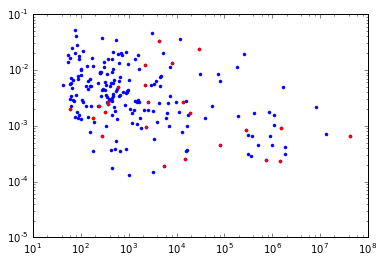

In [30]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['maxstddetrended'], 'b.')
ax.plot(weird['tlyap'], weird['maxstddetrended'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

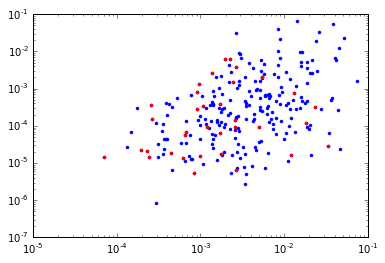

In [31]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['maxstddetrended'], df['maxda'], 'b.')
ax.plot(weird['maxstddetrended'], weird['maxda'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

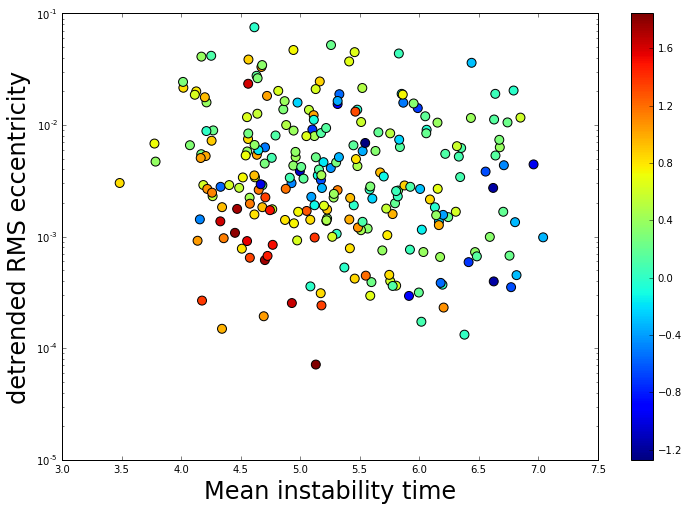

In [101]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
cax = ax.scatter(df['Mean'], df['maxstddetrended'], c=np.log10(-np.log10(df['KSpval']).values), s=80)
#cax = ax.scatter(weird['Mean'], weird['maxstddetrended'], c=np.log10(weird['KSpval']).values/10)
ax.set_yscale('log')
ax.set_ylim([1.e-5, 1.e-1])
ax.set_xlabel('Mean instability time', fontsize=24)
ax.set_ylabel('detrended RMS eccentricity', fontsize=24)
fig.colorbar(cax)
#ax.set_xscale('log')

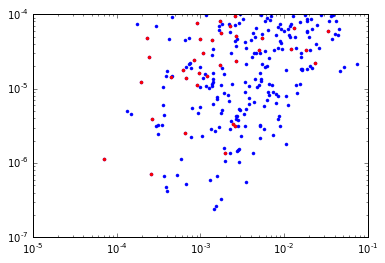

In [65]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['maxstddetrended'], df['maxm'], 'b.')
ax.plot(weird['maxstddetrended'], weird['maxm'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

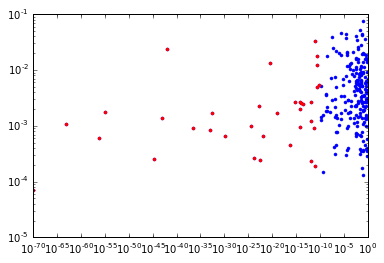

In [32]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['KSpval'], df['maxstddetrended'], 'b.')
ax.plot(weird['KSpval'], weird['maxstddetrended'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

# Try different combinations of parameters

In [33]:
goodlowstd = df[(df['maxstddetrended']<1.e-3) & (df['KSpval']>1.e-10)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
goodlowstd.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
56,1476,0.000149,3.558185e-10
169,2161,0.000420,7.572132e-08
216,2377,0.000311,1.213526e-07
218,23975,0.000454,2.132645e-07
132,1971,0.000786,2.418179e-07


In [34]:
bigmind = df[(df['mind']>0.01) & (df['KSpval']<1.e-10)][['ID', 'mind', 'KSpval']].sort('KSpval')
bigmind.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,mind,KSpval
102,1829,11.901273,1.084816e-70
67,1601,7.877339,7.695895e-64
44,1364,0.221885,5.030259e-57
182,2215,7.741012,9.033013e-56
213,2364,5.906212,2.142884e-45


In [59]:
bigstd = df[df['maxstddetrended']>1.e-3][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(bigstd.shape)
bigstd.head()

(199, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
67,1601,0.001081,7.695895e-64
182,2215,0.001771,9.033013e-56
99,1819,0.001370,1.003610e-43
114,1880,0.023420,1.252303e-42
199,2288,0.001725,2.141012e-33


In [61]:
lowstd = df[df['maxstddetrended']<1.e-3][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(lowstd.shape)
lowstd.head()

(49, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
102,1829,0.000071,1.084816e-70
44,1364,0.000616,5.030259e-57
213,2364,0.000254,2.142884e-45
43,1356,0.000912,2.331498e-37
75,1640,0.000844,1.228910e-33


In [69]:
lowstdshort = df[(df['maxstddetrended']<1.e-3) & (df['Mean'] < 5.5)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(lowstdshort.shape)
lowstdshort.head()

(22, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
102,1829,0.000071,1.084816e-70
44,1364,0.000616,5.030259e-57
213,2364,0.000254,2.142884e-45
43,1356,0.000912,2.331498e-37
75,1640,0.000844,1.228910e-33


In [71]:
badlong = df[(df['KSpval']<1.e-10) & (df['Mean'] > 5.5)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(badlong.shape)
badlong.head()

(2, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
196,2274,0.000447,5.926343e-17
240,4753,0.000231,1.068064e-12


In [36]:
badhighstd = df[(df['KSpval']<1.e-10) & (df['maxstddetrended']>1.e-2)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
badhighstd.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,maxstddetrended,KSpval
114,1880,0.023420,1.252303e-42
25,1230,0.013164,3.016345e-21
124,1928,0.033107,8.270878e-12
126,1942,0.012249,2.122221e-11
85,1742,0.018233,2.706690e-11


/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


m 4.8399028836978624e-05 2.5551988191185988e-05 5.087301374873017e-07
Pratio 2.110147094355015 1.7296156051012814 3.6497433434555595
816908.1629658113
std 0.00515349955652 0.00489434967827 0.0291123030558
final time 816908.1629658113


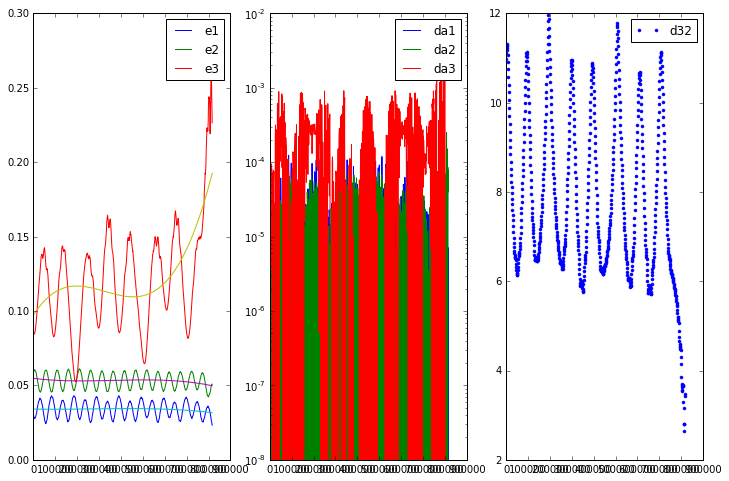

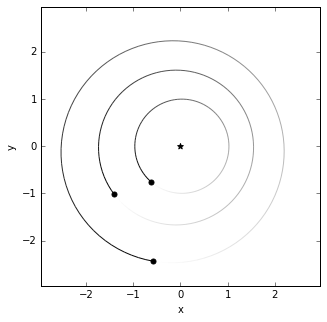

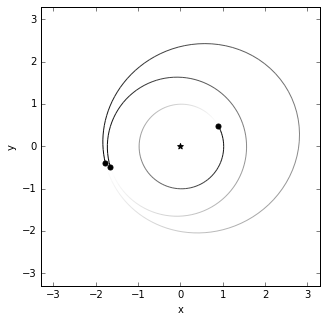

In [75]:
ax, std, da, tlyap, mind, maxm, sim = plotecc(4753, 1.e6)

In [53]:
mind

4.2416956324665192

2.22677586488 4.29930817175 0.0499444566991
1.00384825994 4.59210136255 0.588630169503
1.37922831017 4.28470099033 1.23014519136


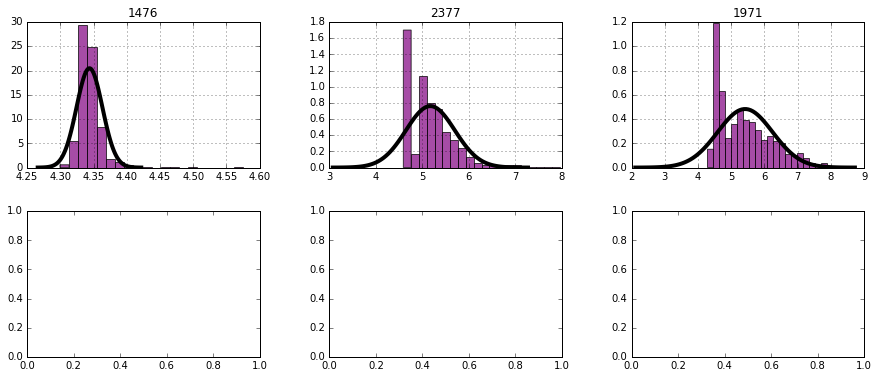

In [55]:
plot_hists([1476, 2377, 1971])

0.890051299254 4.41661187566 0.0336347750484
0.99316500023 4.31851557632 0.150467334391
1.43272304911 4.15581144108 0.181928493952
0.70894066717 4.4612775313 0.191758583486
0.983246075541 4.49261573243 0.260480693859
1.38467090659 3.8109591194 0.990518056577
1.41310045906 4.47393167553 1.0864834806
1.11667536563 4.67411357132 0.392666618489
0.833251932557 4.70525713081 0.154638909864
1.56379313427 4.31521485665 0.375305869029
1.97471642854 3.80950366586 0.872817294799
2.25585292199 4.27475426843 1.17655267558
1.22224144427 3.96168559568 0.319766465045
1.18474332609 4.86587813634 0.660646514323
1.83072936477 3.36826890182 0.954164945256
0.90637631321 4.29043053605 0.399178691595
1.5059817667 4.32146184653 0.884831811701
1.44830516918 3.58401852113 0.64216809705
1.66863127935 3.55295700379 1.3173606241
0.975799503987 4.44739931112 0.185137473236
2.86833589036 3.53951084226 0.743893565773
1.16272831093 5.00050941004 0.434869620369
2.05023515329 5.40112212742 0.86977288745
1.35457507132 5.

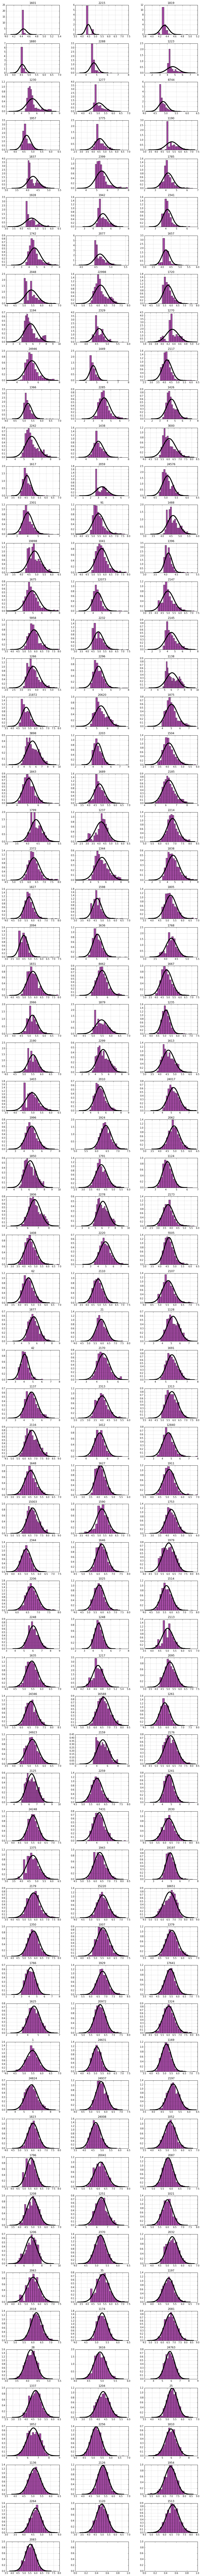

In [60]:
plot_hists(bigstd['ID'])

0.913574821091 5.11056062599 0.0450298550618
0.278281876623 4.68683319613 0.0864509926747
1.77754435998 4.77943269645 0.169554341807
1.29881223833 4.50691427887 0.0537789135472
1.14350054773 4.69323253344 0.0819892754916
1.79135610204 4.28916229884 0.489791181939
1.0540933271 5.10998105842 0.0124734852746
0.748105405245 4.1739215789 0.00262561485307
0.79464514112 4.66478974305 0.461983076594
3.72328143265 4.09555323175 0.530298474652
0.946483246051 5.35177412093 0.201319348716
1.54642245646 3.97182173429 0.426468894845
0.864943800192 5.89950060664 0.347090446046
0.356003599617 4.0917098157 1.25544125607
0.356468235166 4.66854788425 1.20957003726
2.22677586488 4.29930817175 0.0499444566991
2.15543813016 4.50857668971 1.07628380479
1.00384825994 4.59210136255 0.588630169503
1.34705778875 5.27926350562 0.507055437651
1.37922831017 4.28470099033 1.23014519136
1.27901345523 4.24446524507 0.28752686056
1.2708278709 4.8087230497 0.843519771276
2.37364018118 4.29586532831 0.767408717525
1.7143

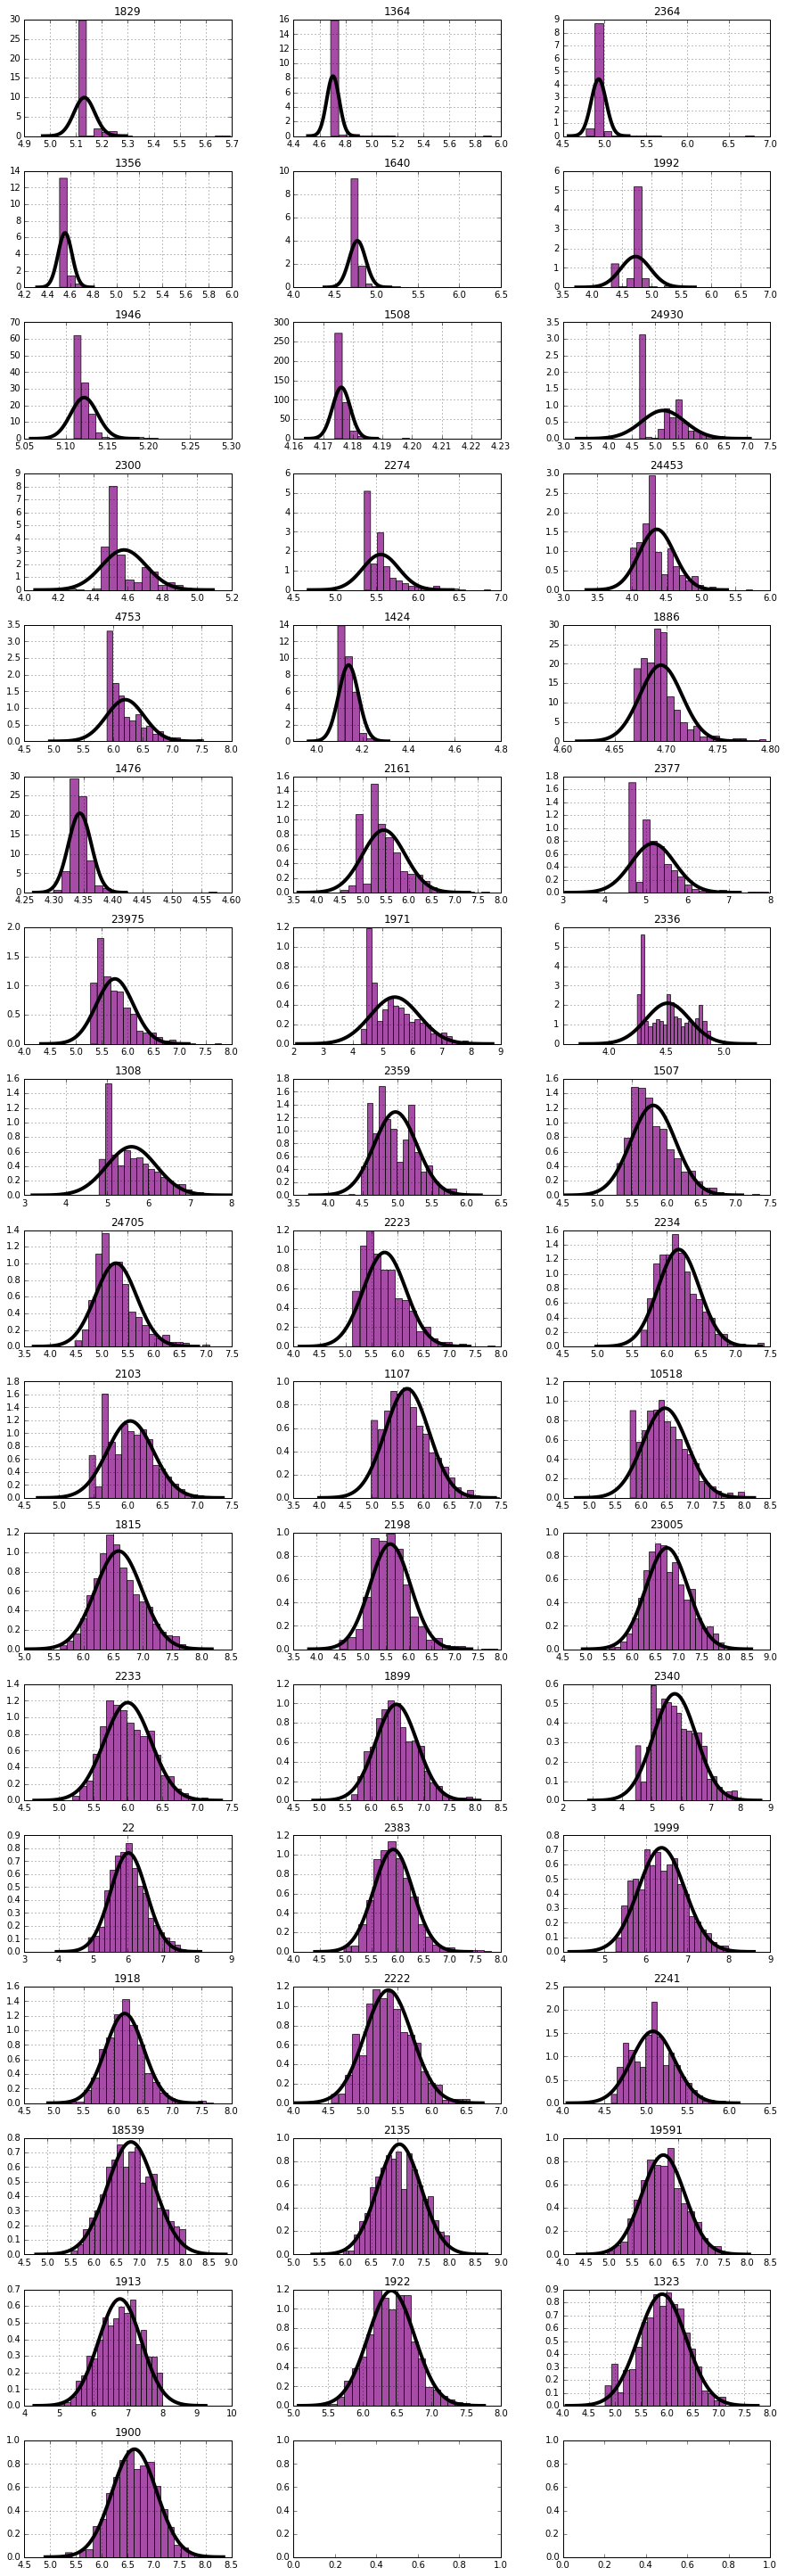

In [62]:
plot_hists(lowstd['ID'])

0.913574821091 5.11056062599 0.0450298550618
0.278281876623 4.68683319613 0.0864509926747
1.77754435998 4.77943269645 0.169554341807
1.29881223833 4.50691427887 0.0537789135472
1.14350054773 4.69323253344 0.0819892754916
1.79135610204 4.28916229884 0.489791181939
1.0540933271 5.10998105842 0.0124734852746
0.748105405245 4.1739215789 0.00262561485307
0.79464514112 4.66478974305 0.461983076594
3.72328143265 4.09555323175 0.530298474652
1.54642245646 3.97182173429 0.426468894845
0.356003599617 4.0917098157 1.25544125607
0.356468235166 4.66854788425 1.20957003726
2.22677586488 4.29930817175 0.0499444566991
2.15543813016 4.50857668971 1.07628380479
1.00384825994 4.59210136255 0.588630169503
1.37922831017 4.28470099033 1.23014519136
1.27901345523 4.24446524507 0.28752686056
2.37364018118 4.29586532831 0.767408717525
2.11109675356 4.47388580895 0.904053495967
2.71369039858 4.49883725673 0.979701726998
2.11763428277 4.567852072 0.588234433293


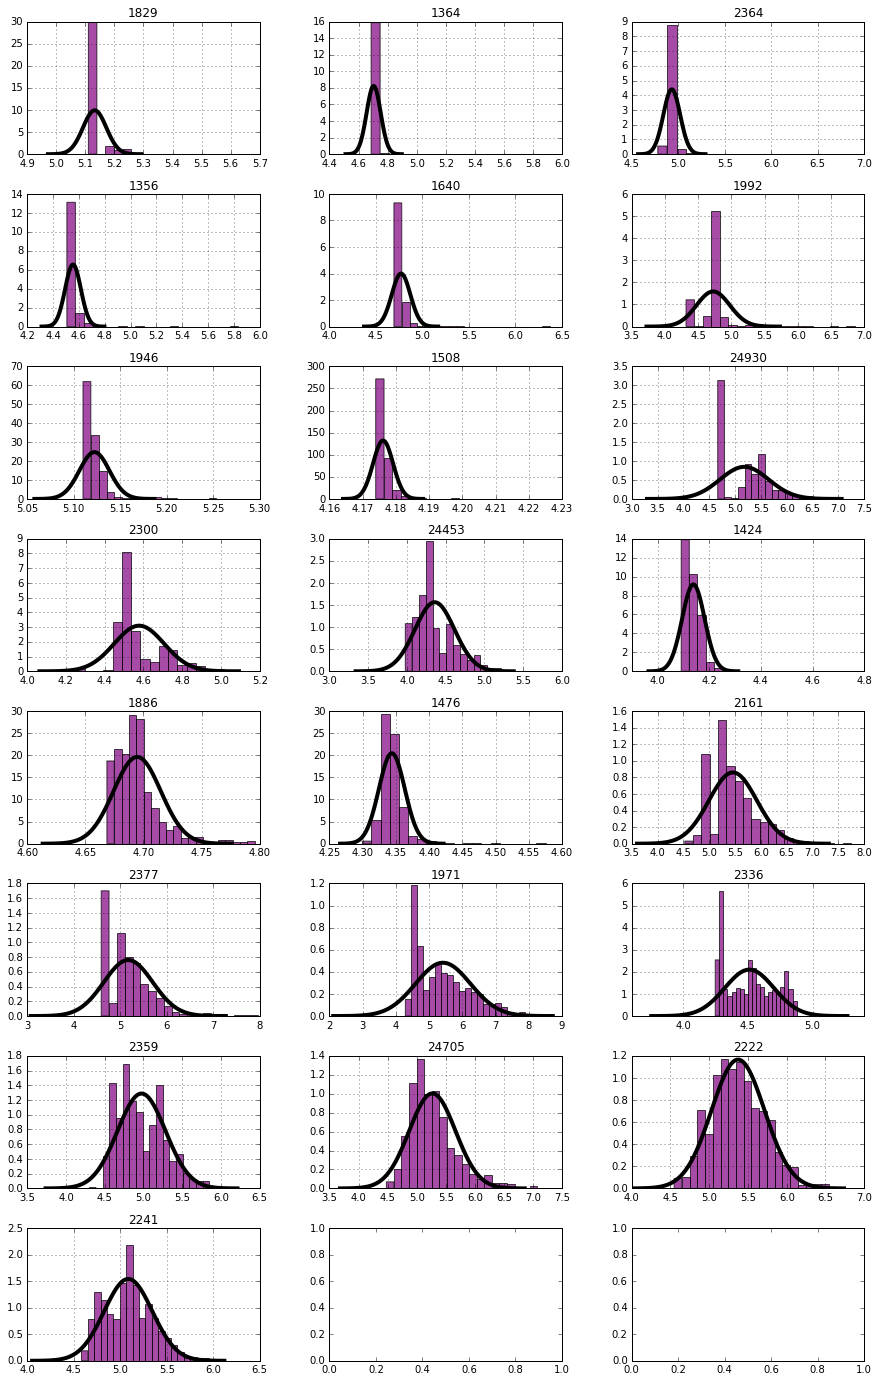

In [70]:
plot_hists(lowstdshort['ID'])

0.946483246051 5.35177412093 0.201319348716
0.864943800192 5.89950060664 0.347090446046
0.864943800192 5.89950060664 0.347090446046


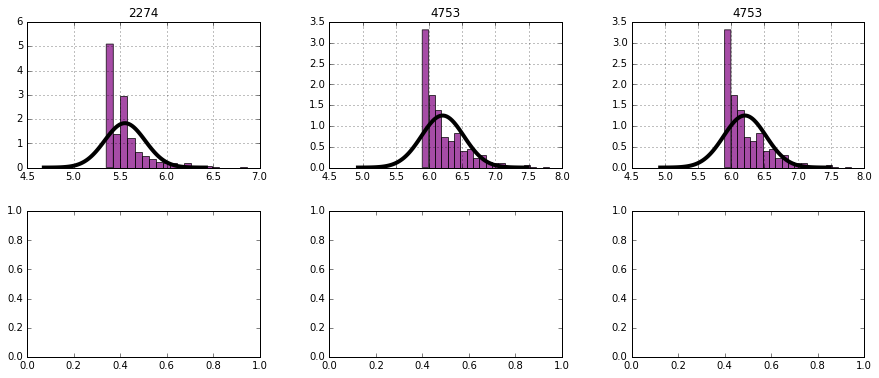

In [74]:
plot_hists([2274, 4753, 4753])

# Check short integration features

In [39]:
dfshort = pd.read_csv('../../csvs/short_integration_features.csv', index_col=0)
dfshort.head()

,runstring,Stable,instability_time,Rel_Eerr,t_final_short,Rel_Eerr_short,avg_a1,std_a1,max_a1,min_a1,...,avg_iH3,std_iH3,max_iH3,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,Lyapunov_time
0,0000000.bin,0.0,1.235644e+07,1.099985e-04,10000.0,1.346025e-08,1.000165,0.000329,1.001248,0.999691,...,4.706365,0.263380,5.264568,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,9041.175397
1,0000001.bin,0.0,1.348749e+05,1.388587e-08,10000.0,8.934681e-10,0.999952,0.000739,1.002089,0.998309,...,1.777638,0.610370,2.507803,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,2192.382019
2,0000002.bin,0.0,1.276381e+04,3.048261e-04,10000.0,3.169983e-08,0.998498,0.001948,1.002043,0.995446,...,0.982187,0.060058,1.060480,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,2191.525922
3,0000003.bin,1.0,1.000000e+09,6.492574e-10,10000.0,6.097589e-10,1.000006,0.000026,1.000126,0.999973,...,9.848375,0.070031,9.914136,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,58599.215966
4,0000004.bin,0.0,8.791888e+01,9.336734e-07,10000.0,5.951220e-03,1.067267,0.030186,1.121364,1.000000,...,1.453843,0.726529,2.660701,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,43524.152375


In [40]:
badshort = dfshort.loc[bad]
goodshort = dfshort.loc[good]
goodshort.shape

(213, 118)

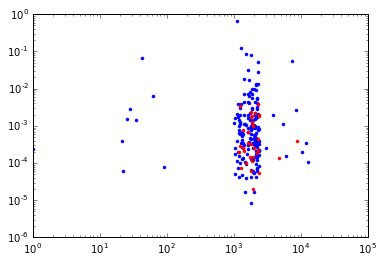

In [41]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(goodshort.index, goodshort['std_a2'], 'b.')
ax.plot(badshort.index, badshort['std_a2'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

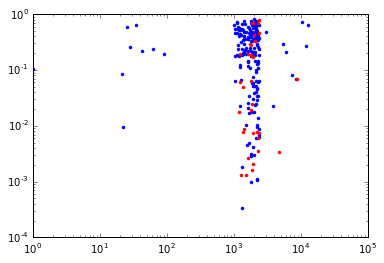

In [42]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(goodshort.index, goodshort['norm_std_window10_e2'], 'b.')
ax.plot(badshort.index, badshort['norm_std_window10_e2'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')